In [1]:
import pandas as pd

http://headctstudy.qure.ai/
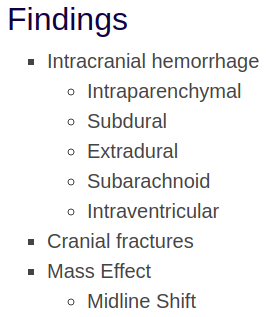

We'll be remapping the labels to major classes only - Intracranial hemorrhage, Cranial fractures and Mass efect, dicarding their subclasses

In [2]:
labels = pd.read_csv('../dataset/reads.csv')

In [3]:
labels#.head()

,name,Category,R1:ICH,R1:IPH,R1:IVH,R1:SDH,R1:EDH,R1:SAH,R1:BleedLocation-Left,R1:BleedLocation-Right,...,R3:EDH,R3:SAH,R3:BleedLocation-Left,R3:BleedLocation-Right,R3:ChronicBleed,R3:Fracture,R3:CalvarialFracture,R3:OtherFracture,R3:MassEffect,R3:MidlineShift
0,CQ500-CT-427,B2,1,1,0,0,0,0,0,1,...,0,0,1,1,0,0,0,0,1,0
1,CQ500-CT-181,B2,1,1,0,1,0,1,1,0,...,1,1,1,0,0,1,1,0,1,1
2,CQ500-CT-99,B1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CQ500-CT-47,B1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CQ500-CT-195,B1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,CQ500-CT-357,B2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,CQ500-CT-80,B2,1,1,1,0,0,0,1,1,...,0,1,1,0,0,0,0,0,1,0
7,CQ500-CT-2,B2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,CQ500-CT-361,B2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,CQ500-CT-412,B2,1,0,0,1,0,0,1,1,...,0,0,1,1,0,0,0,0,1,0


## Let's see what columns are there

We can see that every class (ICH, IPH, etc.) has opinions for each of the three readers (R1, R2, R3).

In [4]:
[print(column) for column in labels.columns]
print()

name
Category
R1:ICH
R1:IPH
R1:IVH
R1:SDH
R1:EDH
R1:SAH
R1:BleedLocation-Left
R1:BleedLocation-Right
R1:ChronicBleed
R1:Fracture
R1:CalvarialFracture
R1:OtherFracture
R1:MassEffect
R1:MidlineShift
R2:ICH
R2:IPH
R2:IVH
R2:SDH
R2:EDH
R2:SAH
R2:BleedLocation-Left
R2:BleedLocation-Right
R2:ChronicBleed
R2:Fracture
R2:CalvarialFracture
R2:OtherFracture
R2:MassEffect
R2:MidlineShift
R3:ICH
R3:IPH
R3:IVH
R3:SDH
R3:EDH
R3:SAH
R3:BleedLocation-Left
R3:BleedLocation-Right
R3:ChronicBleed
R3:Fracture
R3:CalvarialFracture
R3:OtherFracture
R3:MassEffect
R3:MidlineShift



# Take out only major classes, no subclasses

1. "ICH" - Intracranial hemorrhage
2. "Fracture" - All fractures, includes in it both 'CalvarialFracture' and 'OtherFracture'
3. "MassEffect" 

In [5]:
labels = labels.filter(regex='name|:ICH|:Fracture|:MassEffect', axis=1) 
labels.head()

,name,R1:ICH,R1:Fracture,R1:MassEffect,R2:ICH,R2:Fracture,R2:MassEffect,R3:ICH,R3:Fracture,R3:MassEffect
0,CQ500-CT-427,1,0,1,1,0,1,1,0,1
1,CQ500-CT-181,1,1,1,1,1,1,1,1,1
2,CQ500-CT-99,0,0,0,0,0,0,0,0,0
3,CQ500-CT-47,0,0,0,0,0,0,0,0,0
4,CQ500-CT-195,0,0,0,0,0,0,0,0,0


# Perform voting to set the labels 
If at least two readers agree on something, then it's true

In [6]:
# to use in the next cells
name_column = labels[['name']]
name_column.head()

,name
0,CQ500-CT-427
1,CQ500-CT-181
2,CQ500-CT-99
3,CQ500-CT-47
4,CQ500-CT-195


# Take the columns that refer to a specific reader and remove its prefix from column names

In [7]:
# select columns of reader 1
r1 = labels.filter(like='R1', axis=1) 
# remove the 'R1' prefix
r1.columns = r1.columns.str.replace(r'R1:', '')
r1.head()

,ICH,Fracture,MassEffect
0,1,0,1
1,1,1,1
2,0,0,0
3,0,0,0
4,0,0,0


In [8]:
r2 = labels.filter(like='R2', axis=1)
r2.columns = r2.columns.str.replace(r'R2:', '')
r2.head()

,ICH,Fracture,MassEffect
0,1,0,1
1,1,1,1
2,0,0,0
3,0,0,0
4,0,0,0


In [9]:
r3 = labels.filter(like='R3', axis=1)
r3.columns = r3.columns.str.replace(r'R3:', '')
r3.head()

,ICH,Fracture,MassEffect
0,1,0,1
1,1,1,1
2,0,0,0
3,0,0,0
4,0,0,0


# Sum up the opinion of all three readers

In [10]:
votes = r1.add(r2).add(r3)
votes.head(20)

,ICH,Fracture,MassEffect
0,3,0,3
1,3,3,3
2,0,0,0
3,0,0,0
4,0,0,0
5,0,0,0
6,3,0,3
7,0,0,0
8,0,0,0
9,2,0,3


# Perform majority vote

In [11]:
# if at least two readers agreed that the pathology is present, 
# set it to 1, otherwise 0
majority_vote = lambda vote_count: 1 if vote_count >= 2 else 0

In [12]:
# apply majority vote for each cell of the dataframe
voted_labels = votes.applymap(majority_vote)
voted_labels.head(20)

,ICH,Fracture,MassEffect
0,1,0,1
1,1,1,1
2,0,0,0
3,0,0,0
4,0,0,0
5,0,0,0
6,1,0,1
7,0,0,0
8,0,0,0
9,1,0,1


In [13]:
# put it back together with the identifier (name) of the patient
voted_df = pd.concat([name_column, voted_labels], axis=1, sort=False)
voted_df.to_csv('../dataset/simplified_labels.csv', index=False)
voted_df

,name,ICH,Fracture,MassEffect
0,CQ500-CT-427,1,0,1
1,CQ500-CT-181,1,1,1
2,CQ500-CT-99,0,0,0
3,CQ500-CT-47,0,0,0
4,CQ500-CT-195,0,0,0
5,CQ500-CT-357,0,0,0
6,CQ500-CT-80,1,0,1
7,CQ500-CT-2,0,0,0
8,CQ500-CT-361,0,0,0
9,CQ500-CT-412,1,0,1
